In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SVM.utility.preprocess import preprocessData


In [3]:
# Download data
dataset_red = "./dataset_wine/winequality-red.csv"
dataset_white = "./dataset_wine/winequality-white.csv"

# Read the training dataset
data_red = pd.read_csv(dataset_red, sep=';', header=0)
data_white = pd.read_csv(dataset_white, sep=';', header=0)

In [4]:
print(data_red.head)
#print(data_white)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [6]:
train_set, train_X, train_Y, validation_X, validation_Y, test_X, test_Y = preprocessData(
        data_red
    )

print("train_X: ", train_X.shape, "\ntrain_Y: ", train_Y.shape)
print("validation_X: ", validation_X.shape, "\nvalidation_Y: ", validation_Y.shape)
print("test_X: ", test_X.shape, "\ntest_Y: ", test_Y.shape)


data:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        -0.363032          0.189012    -0.991136       -0.008070   0.562400   
1        -0.306770         -0.141106    -0.522781       -0.641252  -0.111146   
2         1.324819          0.794227    -0.262585        0.132637   0.415062   
3         0.087062         -0.361185     0.205770       -0.183954  -0.195339   
4        -0.925648         -0.361185    -0.158506       -0.570899  -0.216387   
..             ...               ...          ...             ...        ...   
954      -1.713312         -0.306165    -0.835018       -0.219131  -0.826788   
955      -0.869387          0.189012    -0.262585       -0.500545  -0.279532   
956       0.312109          1.922129    -0.730939        0.660289   0.015144   
957       1.606127         -0.141106     2.443463        1.856301   0.267724   
958      -0.475555         -0.031067     0.778203       -0.148777  -0.005904   

     free sulfur dioxide  total 

In [8]:
# Convert train_X to a DataFrame if it's not already
train_df = pd.DataFrame(train_X)

# Check dataset shape
print(f"Train set shape: {train_X.shape}, Validation set shape: {validation_X.shape}, Test set shape: {test_X.shape}")

# Check for missing values
print("Missing values per column:\n", train_df.isnull().sum())

# Summary statistics
print("Summary statistics:\n", train_df.describe())

Train set shape: (959, 11), Validation set shape: (320, 11), Test set shape: (320, 11)
Missing values per column:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64
Summary statistics:
                  0             1             2             3             4   \
count  9.590000e+02  9.590000e+02  9.590000e+02  9.590000e+02  9.590000e+02   
mean  -3.185958e-16  2.333899e-16 -1.296611e-16  8.613201e-17  1.824517e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.107144e+00 -2.231851e+00 -1.407451e+00 -1.133727e+00 -1.584527e+00   
25%   -7.006017e-01 -7.463218e-01 -8.870570e-01 -4.301913e-01 -3.637253e-01   
50%   -2.505082e-01 -3.106686e-02 -5.442700e-02 -2.191305e-01 -1.742905e-01   
75%    5.371553e-01  5.741489e-01  7.782030e-01  6.228384e-02  5.724086e-02   
max    4.081641e+00  5.801012e+00  2.703660e+00  9.137898e+00  7.992453e+00   

                 5             6             7     

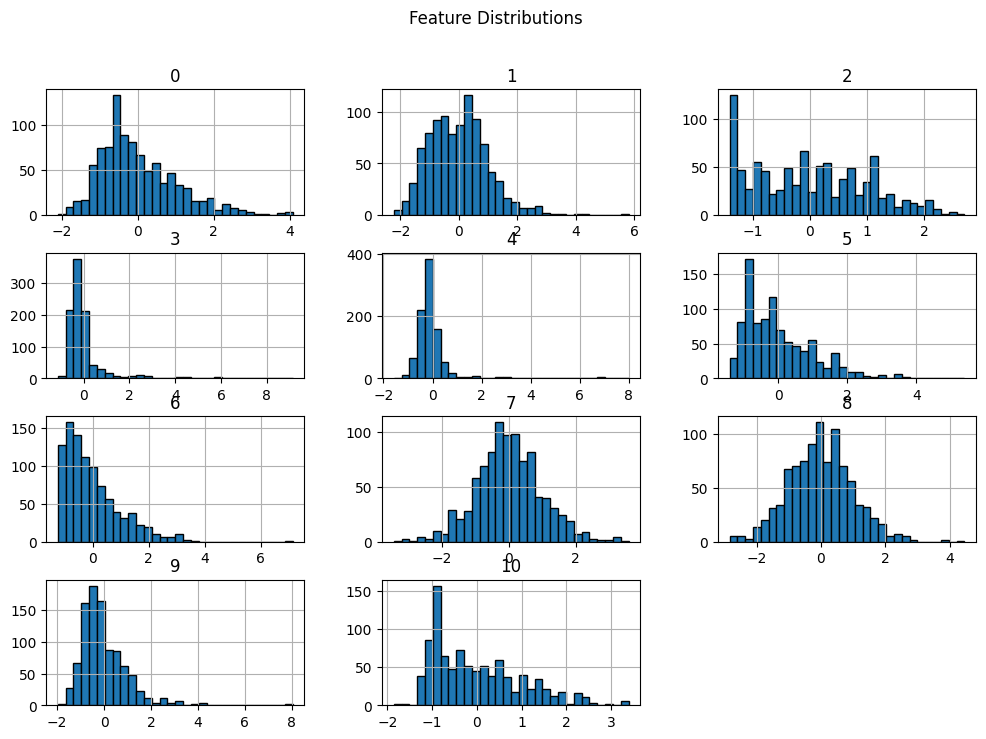

In [9]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(12, 8), bins=30, edgecolor="k")
plt.suptitle("Feature Distributions")
plt.show()

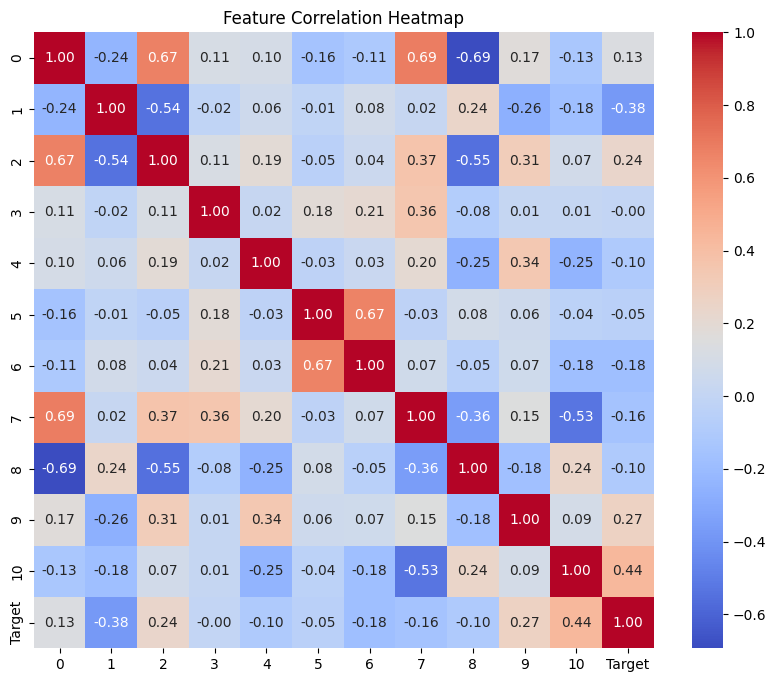

In [10]:
# Convert train_Y to a DataFrame
train_Y_df = pd.DataFrame(train_Y, columns=['Target'])

# Concatenate features and target
full_train_df = pd.concat([train_df, train_Y_df], axis=1)

# Compute correlation matrix
corr_matrix = full_train_df.corr()

# Plot heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


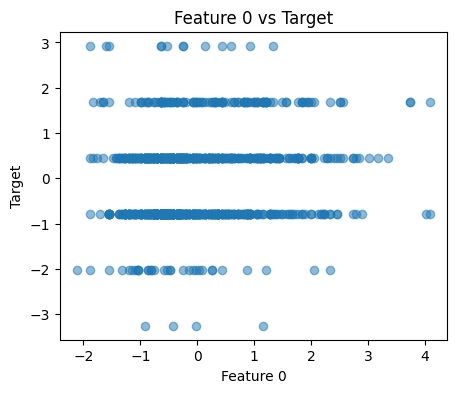

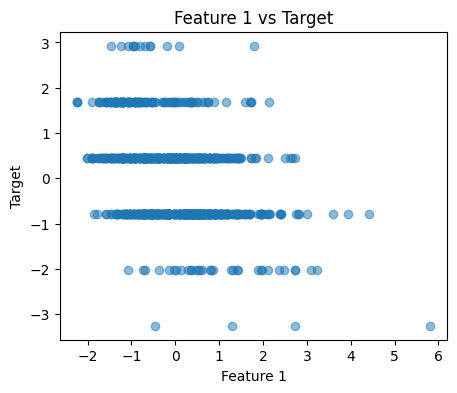

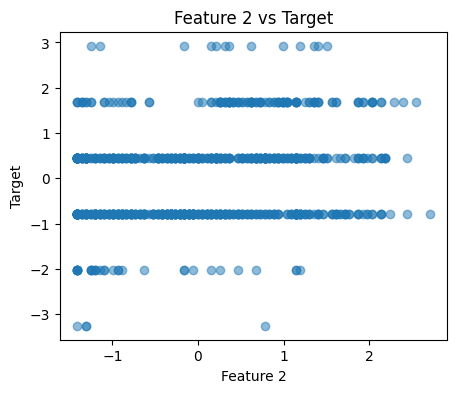

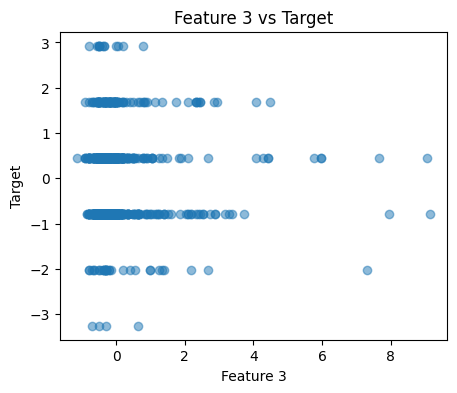

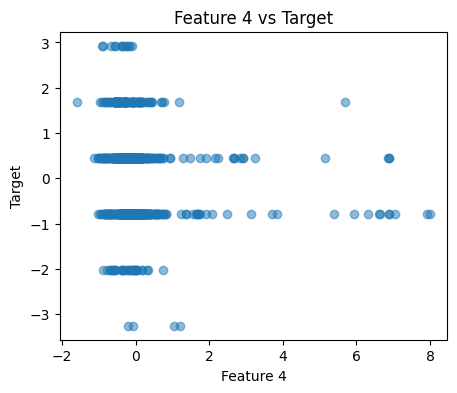

In [11]:
for i in range(min(5, train_X.shape[1])):  # Limit to 5 features
    plt.figure(figsize=(5, 4))
    plt.scatter(train_X[:, i], train_Y, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")
    plt.show()

Target Distribution: Counter({np.float64(-0.7810538420800451): 422, np.float64(0.45497030735025756): 369, np.float64(1.6909944567805604): 119, np.float64(-2.017077991510348): 32, np.float64(2.927018606210863): 13, np.float64(-3.253102140940651): 4})


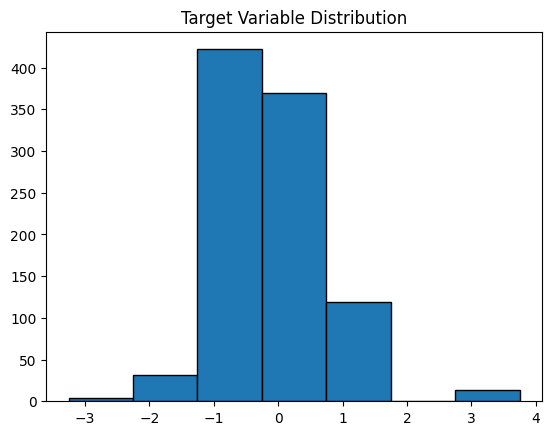

In [12]:
from collections import Counter

print("Target Distribution:", Counter(train_Y.flatten()))
plt.hist(train_Y, bins=np.arange(train_Y.min(), train_Y.max() + 1, 1), edgecolor="black")
plt.title("Target Variable Distribution")
plt.show()